In [1]:
# Generate synchronized, realistic data for multiple regression
import numpy as np
import pandas as pd

np.random.seed(42)
# Generate 400 house data entries
n_samples = 400

# SquareFootage: more realistic distribution
square_footage = np.random.normal(loc=1800, scale=500, size=n_samples).astype(int)
square_footage = np.clip(square_footage, 800, 4000)  # constrain to realistic values

# NumBedrooms: correlated with SquareFootage + randomness
num_bedrooms = np.round((square_footage / 800) + np.random.normal(0, 0.5, size=n_samples)).astype(int)
num_bedrooms = np.clip(num_bedrooms, 1, 6)

# AgeOfHouse: random, but not heavily skewed
age_of_house = np.random.randint(0, 50, size=n_samples)

# Generate Price using a true model + noise
# True model: Price = 100 * sqft + 15000 * bedrooms - 500 * age + noise
price = (
    square_footage * 100 +
    num_bedrooms * 15000 -
    age_of_house * 500 +
    np.random.normal(0, 10000, size=n_samples)  # small noise
)

# Create DataFrame
df_synced = pd.DataFrame({
    "SquareFootage": square_footage,
    "NumBedrooms": num_bedrooms,
    "AgeOfHouse": age_of_house,
    "Price": price.astype(int)
})

# Save to Excel
synced_file_path = "D:/python/housing price.xlsx"
df_synced.to_excel(synced_file_path, index=False)

synced_file_path



'D:/python/housing price.xlsx'

Missing values in each column:
 SquareFootage    0
NumBedrooms      0
AgeOfHouse       0
Price            0
dtype: int64

Basic statistics:
        SquareFootage  NumBedrooms  AgeOfHouse          Price
count     400.000000   400.000000  400.000000     400.000000
mean     1811.070000     2.275000   23.722500  203176.407500
std       466.715307     0.794325   14.611442   56811.436008
min       800.000000     1.000000    0.000000   69461.000000
25%      1472.000000     2.000000   11.750000  161362.000000
50%      1795.500000     2.000000   23.000000  201716.000000
75%      2157.250000     3.000000   36.000000  244494.250000
max      3190.000000     4.000000   49.000000  370980.000000


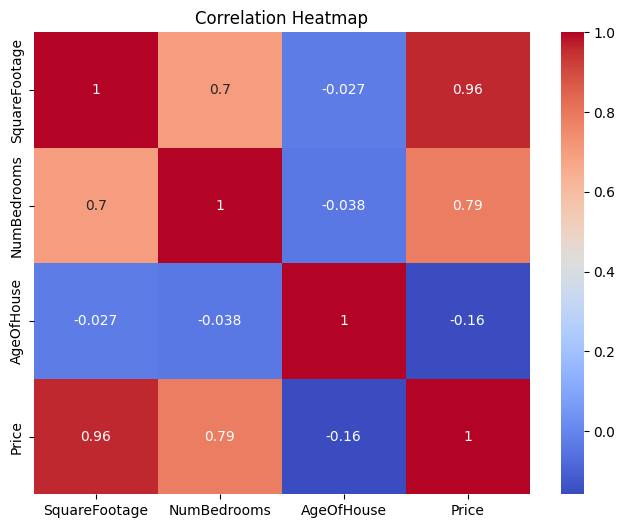

Intercept: -1567.6249905696313
Coefficients: [   99.36563805 15795.21334394  -474.39542479]
Mean Absolute Error (MAE): 8887.339497661735
Mean Squared Error (MSE): 123374107.19623855
Root Mean Squared Error (RMSE): 11107.389756204584
R2 Score: 0.9566442862241554


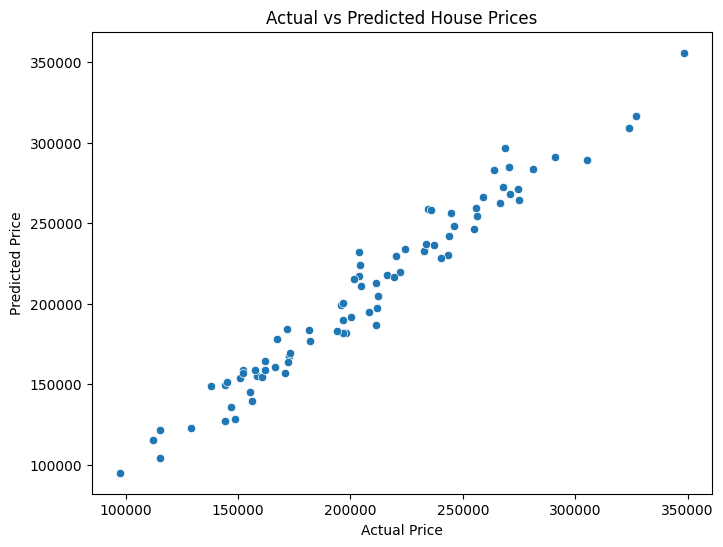

Predicted House Price: $235,061.38


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_excel("D:/python/housing price.xlsx")
# Step 2: Exploratory Data Analysis (EDA)
print("Missing values in each column:\n", df.isnull().sum())
print("\nBasic statistics:\n", df.describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Optional: Remove extreme outliers (houses priced over $1M)
df = df[df['Price'] < 1_000_000]

# Step 3: Prepare Data for Training
X = df[["SquareFootage", "NumBedrooms", "AgeOfHouse"]]
y = df["Price"]

# Step 4: Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Model coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Step 7: Predict on Test Set
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

# Step 9: Visualization of Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Step 10: User Input for Prediction
def user_prediction():
    try:
        sqft = int(input("Enter Square Footage: "))
        bedrooms = int(input("Enter Number of Bedrooms: "))
        age = int(input("Enter Age of the House (years): "))

        # Create a single sample DataFrame
        user_data = pd.DataFrame({
            "SquareFootage": [sqft],
            "NumBedrooms": [bedrooms],
            "AgeOfHouse": [age]
        })

        predicted_price = model.predict(user_data)[0]
        print(f"Predicted House Price: ${predicted_price:,.2f}")
    except ValueError:
        print("Invalid input! Please enter numeric values.")

# Call user prediction
user_prediction()


Missing values in each column:
 SquareFootage    0
NumBedrooms      0
AgeOfHouse       0
Price            0
dtype: int64

Basic statistics:
        SquareFootage  NumBedrooms  AgeOfHouse          Price
count     400.000000   400.000000  400.000000     400.000000
mean     1811.070000     2.275000   23.722500  203176.407500
std       466.715307     0.794325   14.611442   56811.436008
min       800.000000     1.000000    0.000000   69461.000000
25%      1472.000000     2.000000   11.750000  161362.000000
50%      1795.500000     2.000000   23.000000  201716.000000
75%      2157.250000     3.000000   36.000000  244494.250000
max      3190.000000     4.000000   49.000000  370980.000000


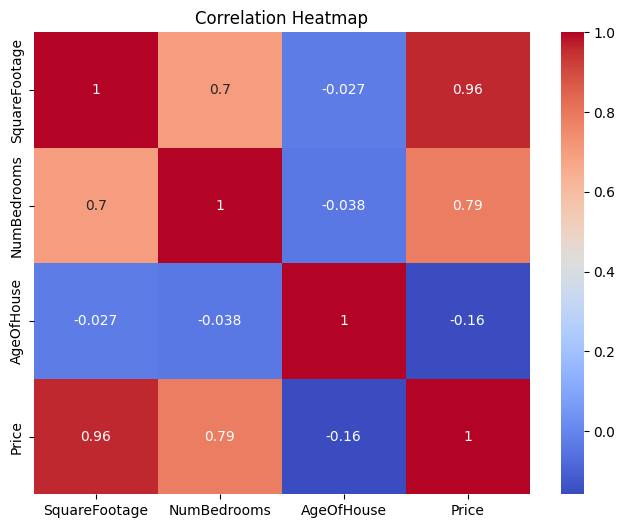


Variance Inflation Factors:
          feature        VIF
0          const  19.159555
1  SquareFootage   1.960646
2    NumBedrooms   1.962045
3     AgeOfHouse   1.001455

Intercept: -1567.6249905696313
Coefficients: [   99.36563805 15795.21334394  -474.39542479]

Mean Absolute Error (MAE): 8887.339497661735
Mean Squared Error (MSE): 123374107.19623855
Root Mean Squared Error (RMSE): 11107.389756204584
R2 Score: 0.9566442862241554


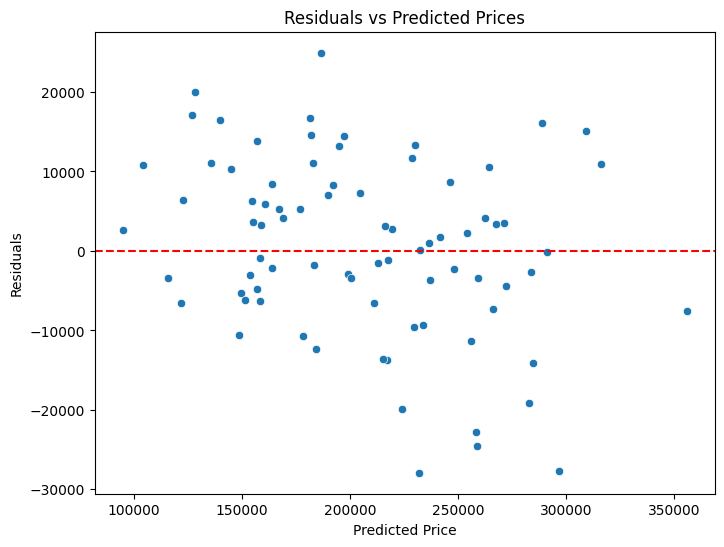


Cross-validated R2 scores: [0.95664429 0.96243905 0.97401282 0.9679194  0.97045293]
Mean CV R2 score: 0.9662936984757415


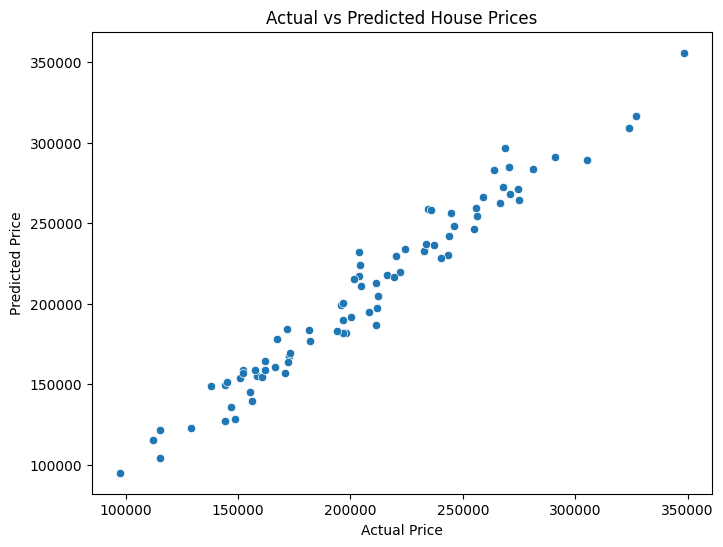

Predicted House Price: $239,805.34


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Load data
df = pd.read_excel("D:/python/housing price.xlsx")

# Step 1: Handle missing values (simple drop for now)
print("Missing values in each column:\n", df.isnull().sum())
df = df.dropna()  # Drop rows with missing data

# Step 2: Basic stats and correlation heatmap
print("\nBasic statistics:\n", df.describe())

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Remove extreme outliers
df = df[df['Price'] < 1_000_000]

# Step 4: Prepare data
X = df[["SquareFootage", "NumBedrooms", "AgeOfHouse"]]
y = df["Price"]

# Step 5: Check multicollinearity with VIF
# Add constant for intercept
X_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\nVariance Inflation Factors:\n", vif_data)

# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Train model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nIntercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Step 8: Predict and evaluate on test set
y_pred = model.predict(X_test)

print("\nMean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

# Step 9: Residual plot to check assumptions
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()

# Step 10: Cross-validation for more reliable performance estimate
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
print("\nCross-validated R2 scores:", cv_scores)
print("Mean CV R2 score:", cv_scores.mean())

# Step 11: Visualization of Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Step 12: User input prediction
def user_prediction():
    try:
        sqft = int(input("Enter Square Footage: "))
        bedrooms = int(input("Enter Number of Bedrooms: "))
        age = int(input("Enter Age of the House (years): "))

        user_data = pd.DataFrame({
            "SquareFootage": [sqft],
            "NumBedrooms": [bedrooms],
            "AgeOfHouse": [age]
        })

        predicted_price = model.predict(user_data)[0]
        print(f"Predicted House Price: ${predicted_price:,.2f}")
    except ValueError:
        print("Invalid input! Please enter numeric values.")

# Call user prediction
user_prediction()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tkinter as tk
from tkinter import messagebox

# Load and prepare data (you can optimize and add all preprocessing here)
df = pd.read_excel("D:/python/housing price.xlsx")
df = df[df['Price'] < 1_000_000].dropna()

X = df[["SquareFootage", "NumBedrooms", "AgeOfHouse"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Tkinter GUI
def predict_price():
    try:
        sqft = float(entry_sqft.get())
        bedrooms = int(entry_bedrooms.get())
        age = int(entry_age.get())
        user_data = pd.DataFrame({
            "SquareFootage": [sqft],
            "NumBedrooms": [bedrooms],
            "AgeOfHouse": [age]
        })
        price = model.predict(user_data)[0]
        messagebox.showinfo("Prediction", f"Predicted House Price: ${price:,.2f}")
    except ValueError:
        messagebox.showerror("Input error", "Please enter valid numeric values!")

root = tk.Tk()
root.title("House Price Predictor")

tk.Label(root, text="Square Footage:").grid(row=0, column=0, padx=10, pady=5)
entry_sqft = tk.Entry(root)
entry_sqft.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Number of Bedrooms:").grid(row=1, column=0, padx=10, pady=5)
entry_bedrooms = tk.Entry(root)
entry_bedrooms.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Age of the House (years):").grid(row=2, column=0, padx=10, pady=5)
entry_age = tk.Entry(root)
entry_age.grid(row=2, column=1, padx=10, pady=5)

btn_predict = tk.Button(root, text="Predict Price", command=predict_price)
btn_predict.grid(row=3, column=0, columnspan=2, pady=10)

root.mainloop()




In [ ]:
''' 
Basic Questions:
What is Multiple Linear Regression? How does it differ from Simple Linear Regression?

Write down the general equation for Multiple Linear Regression.

What assumptions does Multiple Linear Regression make?

How do you interpret the coefficients in Multiple Linear Regression?

What is multicollinearity? How does it affect Multiple Linear Regression?

How do you check for multicollinearity?

What is the difference between R-squared and Adjusted R-squared? Which one is preferred and why?

How do you evaluate the goodness of fit in Multiple Linear Regression?

What is the role of the intercept in Multiple Linear Regression?

Intermediate Questions:
How do you handle categorical variables in Multiple Linear Regression?

What is the difference between correlation and causation in the context of regression?

Explain the concept of p-values in the context of regression coefficients.

How do you deal with outliers or influential data points in Multiple Linear Regression?

What is heteroscedasticity and how can it be detected? How does it affect regression?

How would you perform feature selection for Multiple Linear Regression?

What are interaction terms, and when would you use them?

What are residuals and how do you analyze them?

Advanced / Practical Questions:
Explain how you would implement Multiple Linear Regression from scratch.

What methods do you know to regularize a regression model? Explain Lasso and Ridge regression briefly.

What is the difference between Ordinary Least Squares (OLS) and Gradient Descent in fitting a regression model?

How can you detect and handle multicollinearity when it is severe?

What is Variance Inflation Factor (VIF), and how do you use it?

How do you interpret interaction effects between predictors?

Explain how you can use cross-validation to assess a Multiple Linear Regression model.

What do you do if your model violates the linearity assumption?

How would you explain overfitting in the context of Multiple Linear Regression? How can you prevent it?

Can Multiple Linear Regression handle non-linear relationships? If not, how do you deal with non-linearity?

What is the difference between parametric and non-parametric regression methods?

Scenario / Case Study Questions:
Given a dataset, how would you preprocess it before applying Multiple Linear Regression?

How would you interpret a regression model where one predictor has a negative coefficient?

What would you do if two predictors are highly correlated in your dataset?

You build a Multiple Linear Regression model, but the residual plot shows a pattern — what does it indicate and how would you fix it?

How do you deal with missing data in your regression dataset?

Explain the steps to improve the performance of a regression model if the R-squared is low.

'''

In [ ]:
'''  
Basic Questions & Answers
1. What is Multiple Linear Regression? How does it differ from Simple Linear Regression?

Multiple Linear Regression (MLR) models the relationship between one dependent variable and two or more independent variables.

Simple Linear Regression has only one independent variable.

2. Write down the general equation for Multiple Linear Regression.


3. What assumptions does Multiple Linear Regression make?

Linearity: Relationship between dependent and independent variables is linear.

Independence: Observations are independent.

Homoscedasticity: Constant variance of errors.

Normality: Errors are normally distributed.

No multicollinearity among predictors.

4. How do you interpret the coefficients?

Each 
𝛽𝑖 represents the expected change in  𝑦for a one-unit increase in 𝑥𝑖, holding other variables constant.

5. What is multicollinearity?

When independent variables are highly correlated, causing instability in coefficient estimates.

6. How do you check for multicollinearity?

Use Variance Inflation Factor (VIF). VIF > 5 or 10 indicates multicollinearity.

7. Difference between R-squared and Adjusted R-squared?

R-squared measures proportion of variance explained by model but always increases with more variables.

Adjusted R-squared adjusts for the number of predictors, penalizing unnecessary variables.

8. How do you evaluate goodness of fit?

R-squared, Adjusted R-squared, residual plots, F-test.

9. What is the intercept?

The expected value of 
y when all 𝑥𝑖=0  

Intermediate Questions & Answers
10. Handling categorical variables?

Use dummy variables (one-hot encoding) to convert categories into numerical values.

11. Correlation vs causation?

Correlation measures association; causation implies one variable causes change in another. Regression shows association, not causality.

12. What is a p-value?

It tests if a coefficient is significantly different from zero. Low p-value (< 0.05) means the variable likely affects 
𝑦


13. How to deal with outliers?

Detect using residual plots or influence measures (Cook’s distance). Remove, transform, or use robust regression.

14. What is heteroscedasticity?

Non-constant variance of errors. It violates assumptions and can lead to inefficient estimates. Detect with residual plots or Breusch-Pagan test.

15. Feature selection methods?

Stepwise selection, backward elimination, forward selection, LASSO regression.

16. What are interaction terms?

  t

17. What are residuals?

Difference between observed and predicted  y. Analyzed to check assumptions.

Advanced Questions & Answers
18. How to implement Multiple Linear Regression from scratch?

Use Normal Equation or Gradient Descent to minimize sum of squared residuals.

19. Regularization methods?

Ridge regression (L2 penalty) and Lasso (L1 penalty) to reduce overfitting and handle multicollinearity.

20. OLS vs Gradient Descent?

OLS has closed-form solution; Gradient Descent iteratively updates parameters, useful for large datasets.

21. Handling severe multicollinearity?

Remove correlated variables, use PCA, or apply Ridge regression.

22. What is VIF?

Measures how much variance of coefficient is inflated due to multicollinearity.

23. Interpret interaction effects?

Interaction coefficient shows how the effect of one variable changes depending on another.

24. Cross-validation?

Split data into training and testing folds multiple times to check model generalization.

25. If linearity assumption fails?

Apply transformations or use polynomial regression.

26. Overfitting?

Model fits training data too well, poor on unseen data. Prevent by regularization or simpler models.

27. Can Multiple Linear Regression handle non-linear relationships?

Not directly; use polynomial terms or transform variables.

28. Parametric vs non-parametric regression?

Parametric assumes specific form (like linear). Non-parametric is more flexible (like k-NN, decision trees).

Scenario-based Questions & Answers
29. Preprocessing steps?

Handle missing values, encode categorical variables, check multicollinearity, normalize or standardize if needed.

30. Negative coefficient interpretation?

Predictor negatively affects the dependent variable holding others constant.

31. Two highly correlated predictors?

Remove one or combine them to avoid multicollinearity.

32. Residual plot shows pattern?

Indicates model assumptions violated (e.g., non-linearity, heteroscedasticity). Fix by transforming variables or using different model.

33. Handling missing data?

Impute with mean/median or remove rows.

34. Improving low R-squared?

Add relevant variables, transform variables, try interaction terms or use non-linear models.



  '''